In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/AIfinal

/content/drive/MyDrive/AIfinal


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd





# Load the dataset
maternal_health_df = pd.read_csv('/content/drive/MyDrive/AIfinal/MaternalHealth.csv')



In [22]:
print("Dataset Columns:\n", maternal_health_df.columns)

Dataset Columns:
 Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


In [9]:
maternal_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [10]:
maternal_health_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [12]:
#Check data
maternal_health_df.dtypes


,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


In [18]:
#Check null values
maternal_health_df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [14]:
# Checking for missing values
def check_missing_values(data):
    print("Missing Values in Dataset:")
    print(data.isnull().sum())

# Change 'df' to 'maternal_health_df'
describe_data = maternal_health_df.describe()
print("\nSummary Statistics:\n", describe_data)


Summary Statistics:
                Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [17]:
#Data Cleaning
maternal_health_df = maternal_health_df.dropna()


In [24]:
# Map "Male" to 1 and "Female" to 0
maternal_health_df['RiskLevel'] = maternal_health_df['RiskLevel'].map({'high risk': 1, 'low risk': 0})

# Ensure the 'Gender' column is numeric (in case it has non-numeric data)
maternal_health_df['RiskLevel'] = maternal_health_df['RiskLevel'].fillna(0)

# Ensure the 'Gender' column is of integer type
maternal_health_df['RiskLevel'] = maternal_health_df['RiskLevel'].astype(int)

# Now check the updated column
print(maternal_health_df['RiskLevel'].head())

0    1
1    1
2    1
3    1
4    0
Name: RiskLevel, dtype: int64


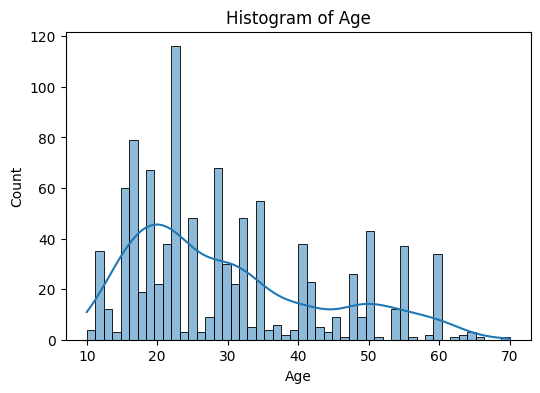

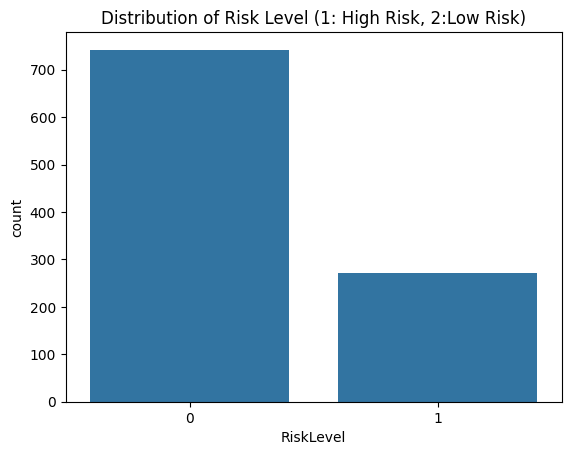

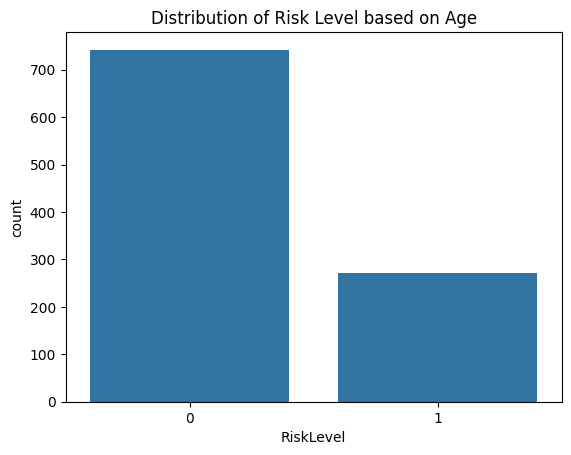

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#Step 4: Data visualization

selected_col = ['Age']  # Keeping only 'Age' since it's numeric

for column in selected_col:
    if column in maternal_health_df.columns:  # Ensure the column exists in the DataFrame
        plt.figure(figsize=(6, 4))
        sns.histplot(maternal_health_df[column], kde=True, bins=50)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()
        print("\n")

# Visualize the distribution of the target variable (Selector)
sns.countplot(x="RiskLevel", data=maternal_health_df)
plt.title("Distribution of Risk Level (1: High Risk, 2:Low Risk)")
plt.show()
print("\n")

sns.countplot(x="RiskLevel", data=maternal_health_df)
plt.title("Distribution of Risk Level based on Age")
plt.show()


Outliers based on IQR:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86          1
1   35         140           90  13.0      98.0         70          1
2   29          90           70   8.0     100.0         80          1
7   35          85           60  11.0     102.0         86          1
9   42         130           80  18.0      98.0         70          1


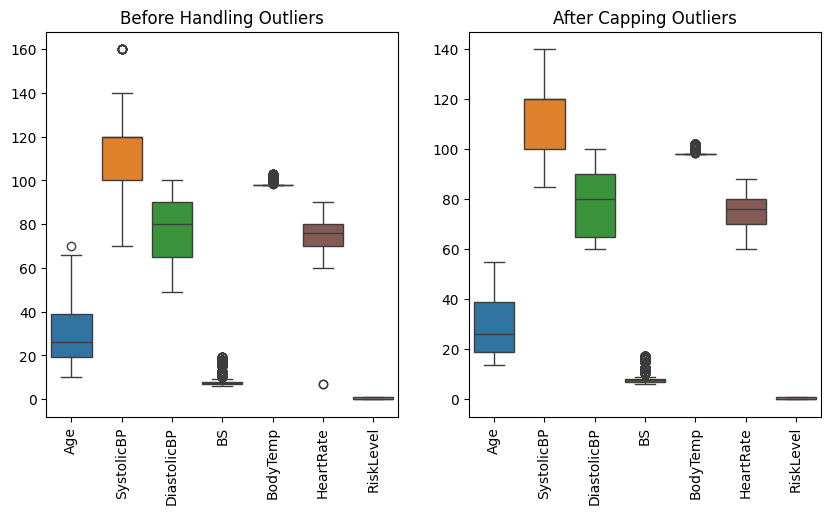

In [28]:

#Outlier handling
def calculate_iqr_outliers(df):
    """
    Detect outliers using the IQR method for numerical columns.
    """
    iqr_outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers in the column
        iqr_outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))

    # Combine all columns to detect rows with any outliers
    outliers = pd.concat(iqr_outliers.values(), axis=1).any(axis=1)

    return iqr_outliers, outliers

def cap_outliers(df, lower_percentile=0.05, upper_percentile=0.95):
    """
    Cap outliers in numerical columns using percentiles.
    """
    df_capped = df.copy()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        lower_bound = df[column].quantile(lower_percentile)
        upper_bound = df[column].quantile(upper_percentile)
        df_capped[column] = np.clip(df[column], lower_bound, upper_bound)
    return df_capped

# Detect outliers using IQR
# Replace 'data' with 'maternal_health_df'
iqr_outliers, outliers_iqr = calculate_iqr_outliers(maternal_health_df)
print("Outliers based on IQR:")
# Replace 'data' with 'maternal_health_df'
print(maternal_health_df[outliers_iqr].head())

# Cap outliers using percentiles
# Replace 'data' with 'maternal_health_df'
data_no_outliers = cap_outliers(maternal_health_df)

# Boxplot to visualize before and after handling outliers
plt.figure(figsize=(10, 5))

# Before handling outliers
plt.subplot(1, 2, 1)
# Replace 'data' with 'maternal_health_df'
sns.boxplot(data=maternal_health_df)
plt.xticks(rotation=90)
plt.title("Before Handling Outliers")

# After handling outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers)
plt.xticks(rotation=90)
plt.title("After Capping Outliers")

plt.show()

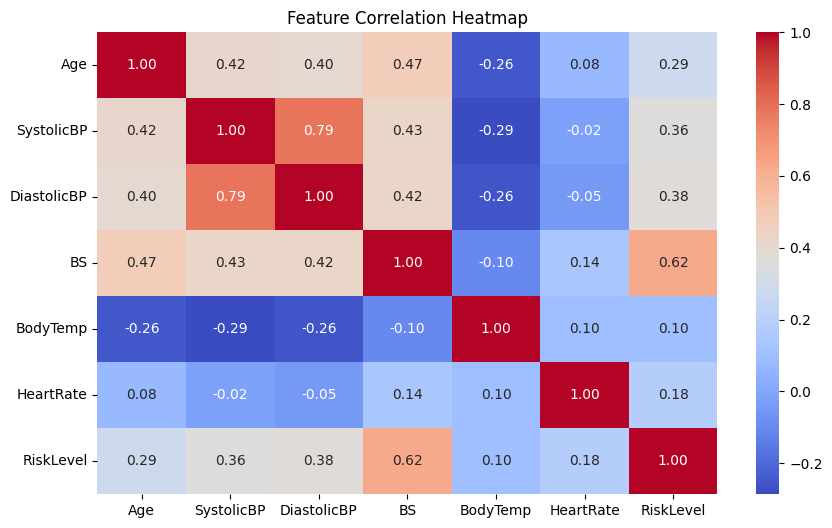

In [30]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(maternal_health_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#Building a model from scratch






In [33]:
import numpy as np

#Function to split the dataset
def train_test_split(X, y, test_size=0.2, random_state=None):
    n_samples = X.shape[0]
    n_test = int(n_samples * test_size)
    indices = np.arange(n_samples)

    # Set the random seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)

    np.random.shuffle(indices)  # Shuffle the indices
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

#Prepare features and target
X = maternal_health_df.drop(columns='RiskLevel')
y = maternal_health_df['RiskLevel']

#Split the dataset with a fixed random seed for reproducibility
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [35]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    z = np.asarray(z)  # Ensure z is always treated as an array-like object
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []  # Initialize loss history to track during training

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 0.01  # Random initialization
        self.bias = 0
        epsilon = 1e-10

        # Gradient Descent
        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_model)

            predictions = np.clip(predictions, epsilon, 1 - epsilon)

            # Compute loss
            loss = - (1 / n_samples) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.loss_history.append(loss)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in predictions]

    def predict_proba(self, X):
        """Returns probability estimates for each sample."""
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)


In [36]:
# Create an instance of the LogisticRegressionScratch class
model_scratch = LogisticRegression(learning_rate=0.01, n_iterations=1000)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train the model on the balanced dataset
model_scratch.fit(X_train_balanced, y_train_balanced)

y_pred_scratch = model_scratch.predict(X_test)

In [38]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_scratch)
precision = precision_score(y_test, y_pred_scratch)
recall = recall_score(y_test, y_pred_scratch)
f1 = f1_score(y_test, y_pred_scratch)

# Display the results
print("FROM SCRATCH:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

FROM SCRATCH:
Accuracy: 0.7921
Precision: 0.7500
Recall: 0.1304
F1 Score: 0.2222


In [41]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
# Train Logistic Regression using Sklearn
model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000)

In [42]:
# Make Predictions on the Test Set
y_pred_sklearn = model_sklearn.predict(X_test)

# Evaluate the Sklearn Model

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)


# Display the results for Sklearn Logistic Regression
print("Logistic Regression (Sklearn):")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")

Logistic Regression (Sklearn):
Accuracy: 0.8713
Precision: 0.6667
Recall: 0.8696
F1 Score: 0.7547


In [43]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # Use 'macro' or 'weighted' based on class imbalance
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Display the results
print("Random Forest Classification:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Random Forest Classification:
Accuracy: 0.9356
Precision: 0.9352
Recall: 0.9356
F1 Score: 0.9354


In [44]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'max_iter': [100, 500, 1000],  # Number of iterations
    'solver': ['liblinear', 'saga'],  # Solvers that support L1 and L2 penalties
    'penalty': ['l1', 'l2']  # Penalty type
}

# Cross-validation scheme
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression model and GridSearchCV
model_sklearn = LogisticRegression()
grid_search = GridSearchCV(estimator=model_sklearn, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_balanced, y_train_balanced)

# Extract the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the results
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8336352064011638


In [45]:
# Best model with the optimal parameters
best_model = LogisticRegression(C=0.1, max_iter=1000)

# Train the best model
best_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_sklearn = best_model.predict(X_test)

# Evaluate performance
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

# Print results
print("Logistic Regression (Sklearn) after Tuning:")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")

Logistic Regression (Sklearn) after Tuning:
Accuracy: 0.8713
Precision: 0.6667
Recall: 0.8696
F1 Score: 0.7547


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 500],   # Number of trees
    'max_depth': [5, 10, 20, None],        # Depth of each tree
    'min_samples_split': [2, 5, 10],       # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Min samples in each leaf node
    'bootstrap': [True, False]             # Use bootstrapping or not
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search with 5-fold CV
random_search_rf = RandomizedSearchCV(rf, param_dist, cv=5, scoring='accuracy', n_jobs=-1, n_iter=20, random_state=42)
random_search_rf.fit(X_train, y_train)

# Best parameters and best cross-validation score
best_params = random_search_rf.best_params_
best_score = random_search_rf.best_score_

print("Best parameters for Random Forest:", best_params)
print("Best cross-validation score (Accuracy):", best_score)

Best parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Best cross-validation score (Accuracy): 0.9384079375899417


In [47]:
# Train the best model found from tuning
best_rf_model = random_search_rf.best_estimator_

# Make predictions
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best, average='weighted')
recall_rf_best = recall_score(y_test, y_pred_rf_best, average='weighted')
f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')

# Display results
print("Random Forest Classification (After Tuning):")
print(f"Accuracy: {accuracy_rf_best:.4f}")
print(f"Precision: {precision_rf_best:.4f}")
print(f"Recall: {recall_rf_best:.4f}")
print(f"F1 Score: {f1_rf_best:.4f}")

Random Forest Classification (After Tuning):
Accuracy: 0.9307
Precision: 0.9307
Recall: 0.9307
F1 Score: 0.9307


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
# Define your feature names
feature_names = [
    "Age", "SystolicBP", "DiastolicBP","BS","BodyTemp", "HeartRate"
]

# Ensure X_train is a Pandas DataFrame
if isinstance(X_train_balanced, np.ndarray):
    X_train_balanced = pd.DataFrame(X_train_balanced, columns=feature_names)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=feature_names)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=log_reg, n_features_to_select=5)  # Select top 5 important features
rfe.fit(X_train_balanced, y_train_balanced)

# Get selected feature names
selected_features = X_train_balanced.columns[rfe.support_]
print("Selected Features:", list(selected_features))

Selected Features: ['SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']


In [50]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)  # Using all cores for efficiency

# Initialize RFE with the number of features to select
top_n = 5  # Select the top 5 most important features
rfe = RFE(estimator=rf, n_features_to_select=top_n)

# Fit RFE to training data
rfe.fit(X_train_balanced, y_train_balanced)

# Get selected feature names
selected_features = np.array(feature_names)[rfe.support_]

# Transform the datasets to include only selected features
X_train_transformed = pd.DataFrame(rfe.transform(X_train_balanced), columns=selected_features)
X_test_transformed = pd.DataFrame(rfe.transform(X_test), columns=selected_features)

# Display the selected features
print("Top 5 Selected Features using RFE with Random Forest:")
print(selected_features)

Top 5 Selected Features using RFE with Random Forest:
['Age' 'SystolicBP' 'DiastolicBP' 'BS' 'BodyTemp']


In [49]:
# Use the selected features from RFE
selected_features = ['Age' ,'SystolicBP', 'DiastolicBP' ,'BS' ,'BodyTemp']

# Select the features from X_train and X_test
X_train_selected = X_train_balanced[selected_features]
X_test_selected = X_test[selected_features]

# Initialize Random Forest with the best parameters found during tuning
final_random_forest_model = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=20,
    bootstrap=True
)

# Train the Random Forest model using the selected features
final_random_forest_model.fit(X_train_selected, y_train_balanced)

# Make predictions on the test set
y_pred = final_random_forest_model.predict(X_test_selected)

# Evaluate the model performance
accuracy_final = accuracy_score(y_test, y_pred)
precision_final = precision_score(y_test, y_pred)
recall_final = recall_score(y_test, y_pred)
f1_final = f1_score(y_test, y_pred)

# Display results
print("Final Random Forest Model with Selected Features and Best Hyperparameters:")
print(f"Accuracy: {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1 Score: {f1_final:.4f}")

Final Random Forest Model with Selected Features and Best Hyperparameters:
Accuracy: 0.9455
Precision: 0.8889
Recall: 0.8696
F1 Score: 0.8791
